# **Lending Club Loan Default Prediction**


## Import packages and load the data

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


pd.set_option('display.max_columns', 60)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)


def ignore_warn(*args, **kwargs):
    pass


# ignore annoying warning (from sklearn and seaborn)
warnings.warn = ignore_warn

In [42]:
RawLoan = pd.read_csv('Loan.csv')
RawLoan.shape

(42538, 56)

In [43]:
# Show the first five rows
RawLoan.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag
0,NaN,5000.000,5000.000,4975.000,36 months,10.65%,162.870,B,B2,NaN,10+ years,RENT,24000.000,Verified,Dec-2011,Fully Paid,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.650,0.000,Jan-1985,1.000,nan,nan,3.000,0.000,13648.000,83.7%,9.000,f,0.000,0.000,5863.155,5833.840,5000.000,863.160,0.000,0.000,0.000,Jan-2015,171.620,NaN,Jul-2017,0.000,1.000,INDIVIDUAL,0.000,0.000,0.000,0.000,0.000,N
1,NaN,2500.000,2500.000,2500.000,60 months,15.27%,59.830,C,C4,Ryder,< 1 year,RENT,30000.000,Source Verified,Dec-2011,Charged Off,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.000,0.000,Apr-1999,5.000,nan,nan,3.000,0.000,1687.000,9.4%,4.000,f,0.000,0.000,1014.530,1014.530,456.460,435.170,0.000,122.900,1.110,Apr-2013,119.660,NaN,Oct-2016,0.000,1.000,INDIVIDUAL,0.000,0.000,0.000,0.000,0.000,N
2,NaN,2400.000,2400.000,2400.000,36 months,15.96%,84.330,C,C5,NaN,10+ years,RENT,12252.000,Not Verified,Dec-2011,Fully Paid,n,NaN,small_business,real estate business,606xx,IL,8.720,0.000,Nov-2001,2.000,nan,nan,2.000,0.000,2956.000,98.5%,10.000,f,0.000,0.000,3005.667,3005.670,2400.000,605.670,0.000,0.000,0.000,Jun-2014,649.910,NaN,Jun-2017,0.000,1.000,INDIVIDUAL,0.000,0.000,0.000,0.000,0.000,N
3,NaN,10000.000,10000.000,10000.000,36 months,13.49%,339.310,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.000,Source Verified,Dec-2011,Fully Paid,n,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.000,0.000,Feb-1996,1.000,35.000,nan,10.000,0.000,5598.000,21%,37.000,f,0.000,0.000,12231.890,12231.890,10000.000,2214.920,16.970,0.000,0.000,Jan-2015,357.480,NaN,Apr-2016,0.000,1.000,INDIVIDUAL,0.000,0.000,0.000,0.000,0.000,N
4,NaN,3000.000,3000.000,3000.000,60 months,12.69%,67.790,B,B5,University Medical Group,1 year,RENT,80000.000,Source Verified,Dec-2011,Fully Paid,n,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.940,0.000,Jan-1996,0.000,38.000,nan,15.000,0.000,27783.000,53.9%,38.000,f,0.000,0.000,4066.908,4066.910,3000.000,1066.910,0.000,0.000,0.000,Jan-2017,67.300,NaN,Jan-2017,0.000,1.000,INDIVIDUAL,0.000,0.000,0.000,0.000,0.000,N


In [44]:
# drop id column
Loan = RawLoan.drop(columns=['id'])
# drop rows with NA's for all columns
Loan = Loan.dropna(axis=0, how='all')

In [45]:
# Turn the interest rate into a numerical feature
Loan['int_rate'] = Loan['int_rate'].apply(lambda x: float(x[:-1])/100)

In [46]:
# check for missing value


def check_missing_value(df):
    '''Check for missing values in df 
        Print the column names and 
        the number of missing values in each column
    '''
    missing_value_column_name = []
    for i, j in zip(df.columns, df.isnull().sum(axis=0)):
        if j > 0:
            print(i, j, df[i].dtype)
            missing_value_column_name.append(i)
    print("The number of columns with missing values:",
          len(missing_value_column_name))

# ***I. Exploratory Data Analysis***



From the bar chart below, we notice that quite a high proportion of the loan applicants is on the purpose of paying their other sources of obligations.

Text(0.5, 1.0, 'Purpose of Loan')

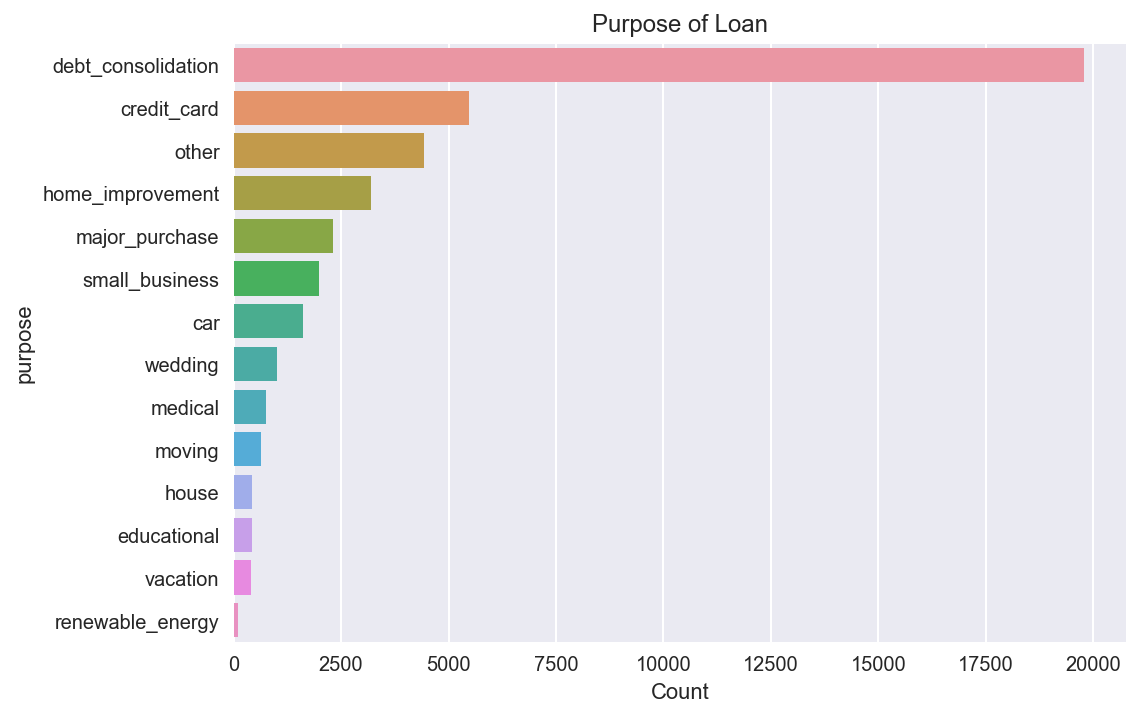

In [47]:
# Loan Purpose
plt.style.use('seaborn')
sns.countplot(y="purpose", data=Loan,
              order=Loan["purpose"].value_counts().index)
plt.xlabel('Count')
plt.title('Purpose of Loan')

The interest rate shows a  strong correlation with the credit grade. The higher the credit grade, the lower the interest rate.

Text(0, 0.5, 'Interest Rate')

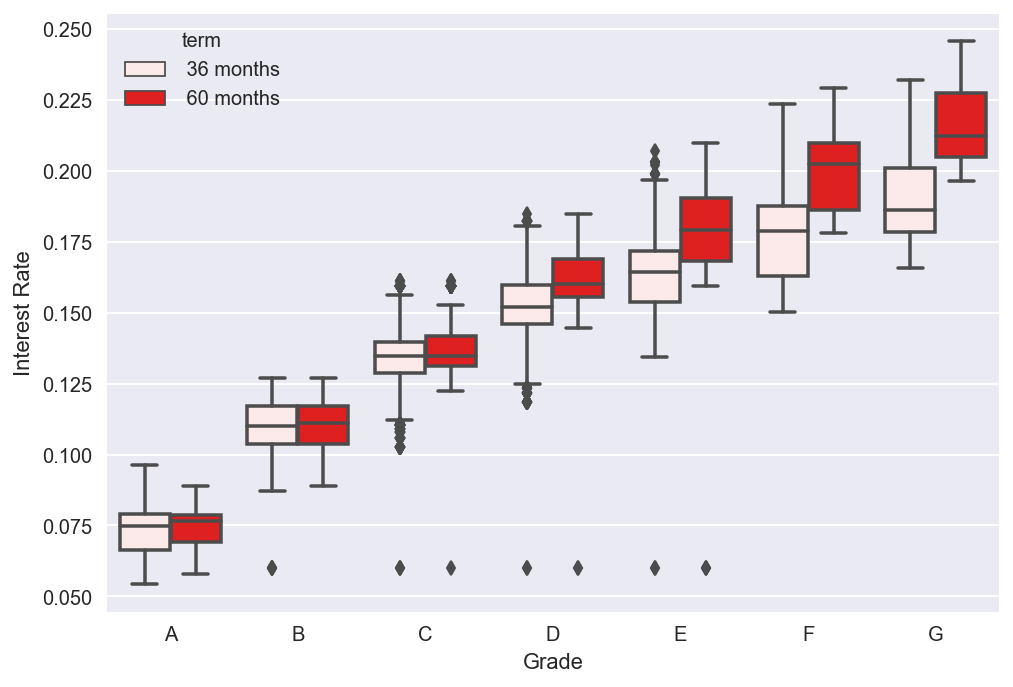

In [48]:
sns.boxplot(x='grade', y='int_rate', data=Loan,
            order=['A', 'B', 'C', 'D', 'E', 'F', 'G'], hue='term', color='r')
plt.xlabel('Grade')
plt.ylabel('Interest Rate')

In [49]:
Loan.groupby('term').mean()['int_rate']

term
 36 months   0.112
 60 months   0.149
Name: int_rate, dtype: float64

On average, the interest rate of a 60-month term loan is 3.7 % higher than that of a 36-month term loan. We can also see that the interest rates differ among different loan purposes. The maximum loan limit is up to $35,000.

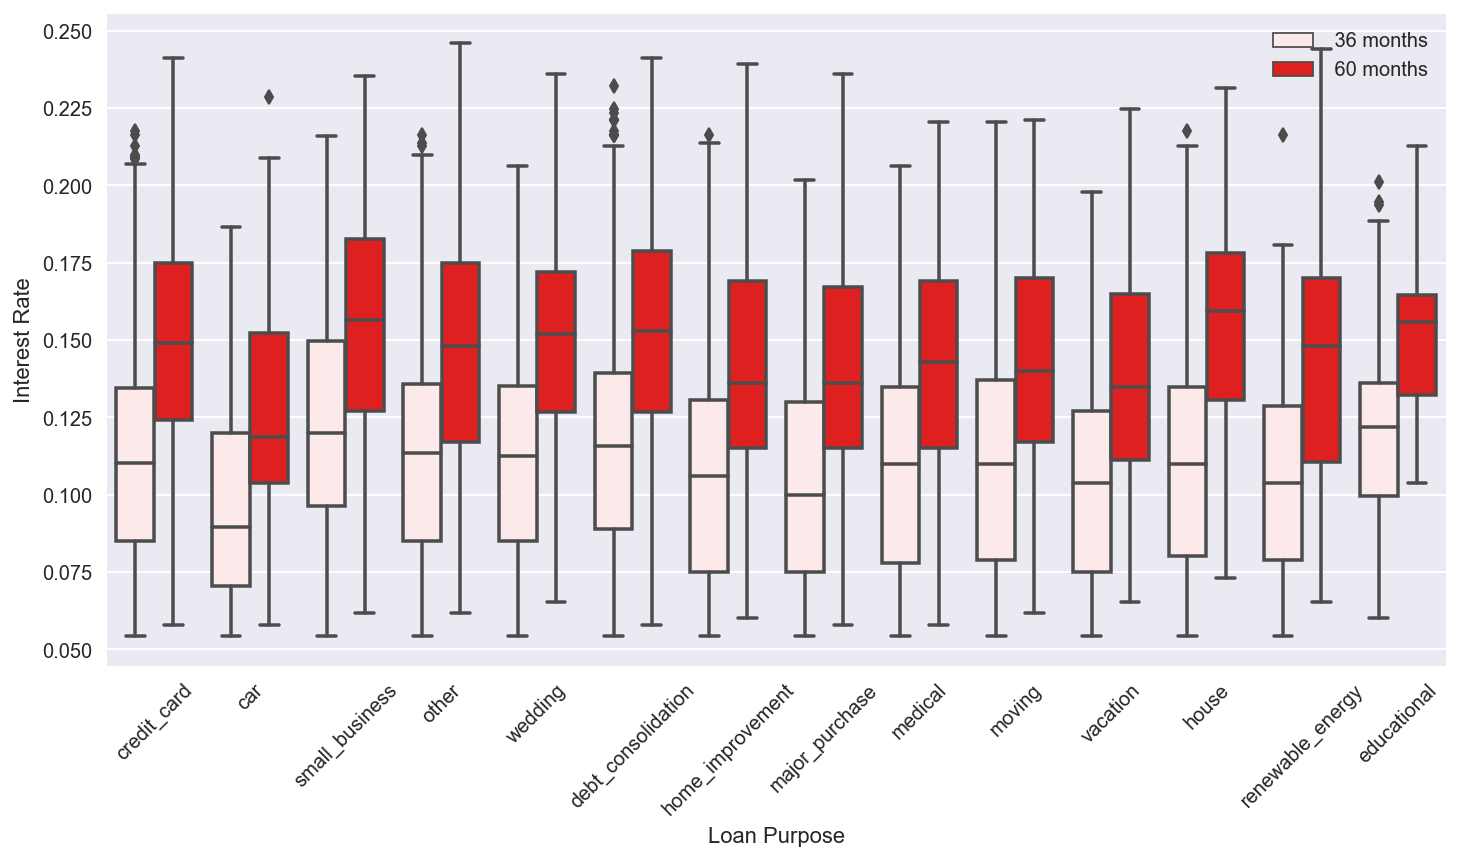

In [50]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='purpose', y='int_rate', data=Loan, hue='term', color='r')
plt.ylabel('Interest Rate')
plt.xlabel('Loan Purpose')
plt.xticks(rotation=45)
plt.legend(loc='upper right')

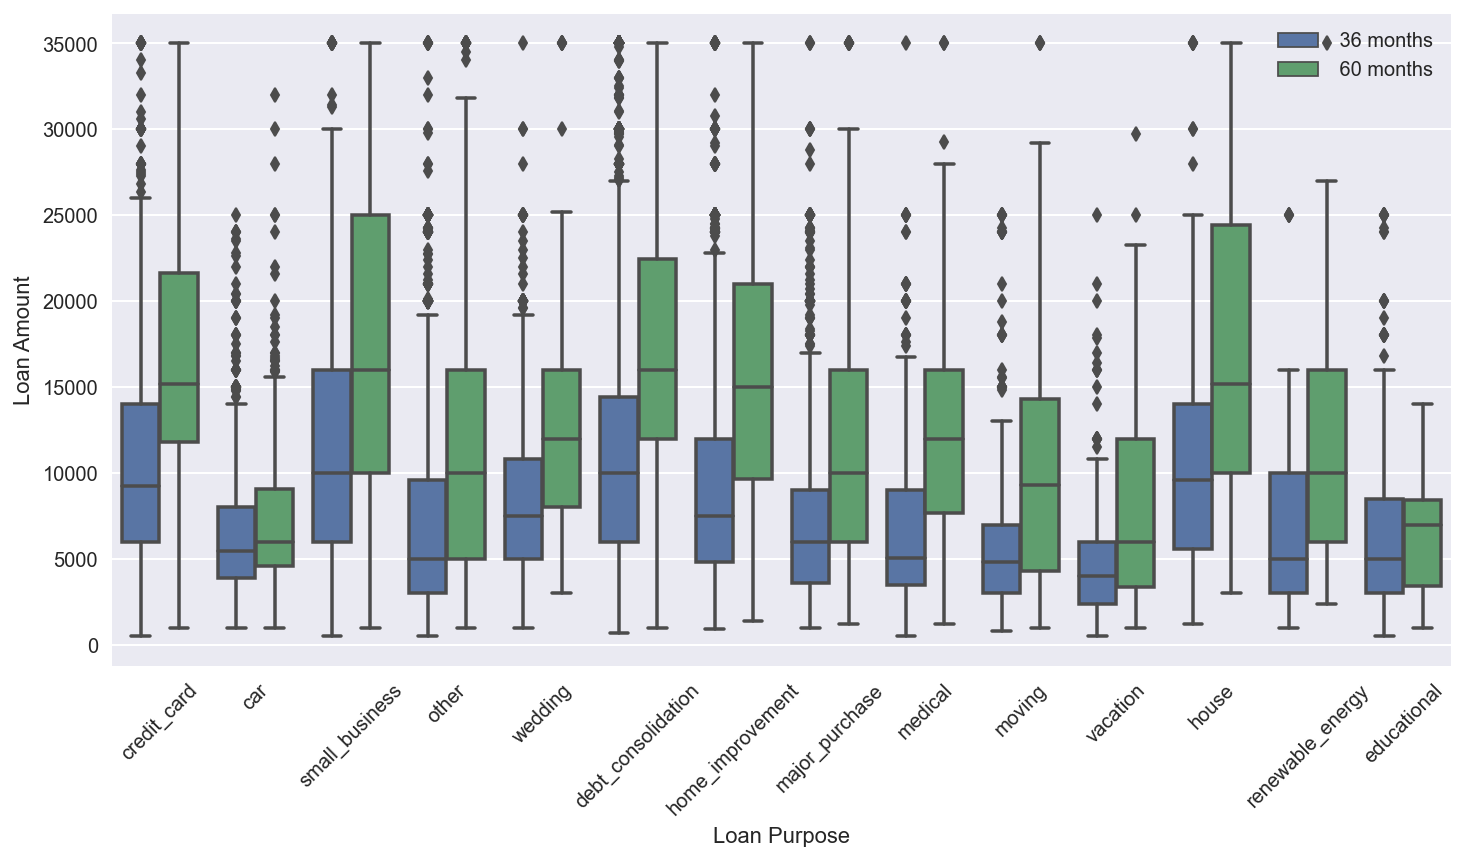

In [51]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='purpose', y='loan_amnt', data=Loan, hue='term')
plt.ylabel('Loan Amount')
plt.xlabel('Loan Purpose')
plt.xticks(rotation = 45)
plt.legend(loc='upper right');

The geographical distribution of lenders is consistent with America's demographic profile.

In [52]:
import plotly.graph_objects as go

df_location = Loan.groupby(["addr_state"]).sum().reset_index()
df_location = df_location.filter(["addr_state", "loan_amnt"], axis=1)

fig = go.Figure(data=go.Choropleth(
    locations=df_location['addr_state'],  # Spatial coordinates
    z=df_location['loan_amnt'].astype(float),  # Data to be color-coded
    locationmode='USA-states',  # set of locations match entries in `locations`
    colorscale='Reds',
    colorbar_title="Millions USD",
))

fig.update_layout(
    title_text='Total amount issued by State',
    geo_scope='usa',  # limited map scope to USA
)

fig.show()

The debt to income ratio is calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income. Most of these borrowers have a rough 15% debt to income ratio. We can see that maximum is no greater than 30%. 

Text(0.5, 1.0, 'Histogram of Debt to Income Ratio')

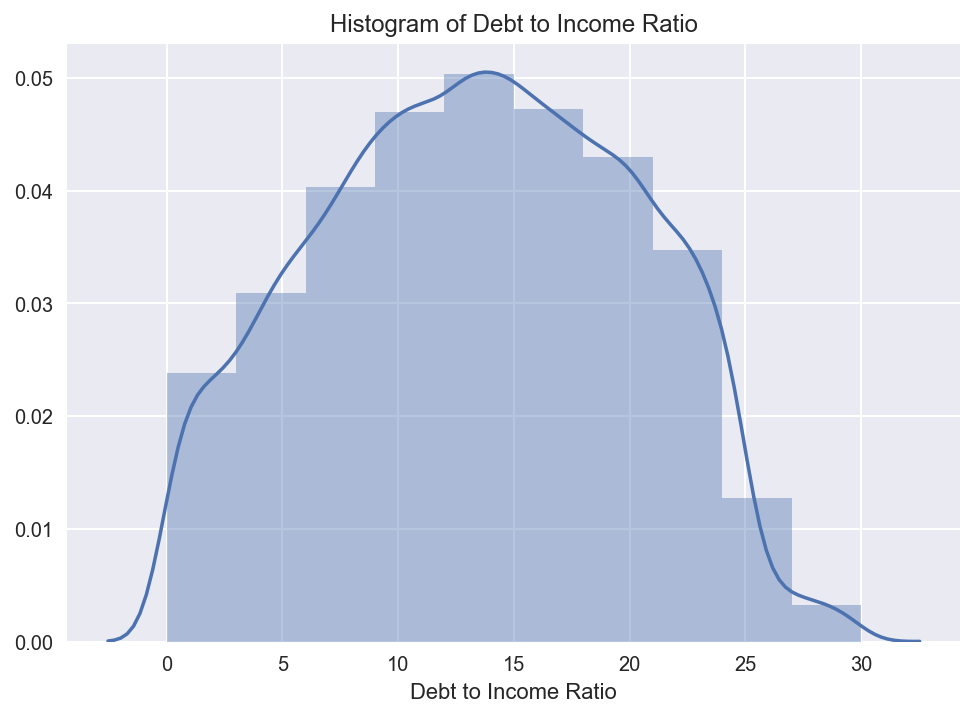

In [53]:
sns.distplot(Loan['dti'], bins=10)
plt.xlabel("Debt to Income Ratio")
plt.title("Histogram of Debt to Income Ratio")

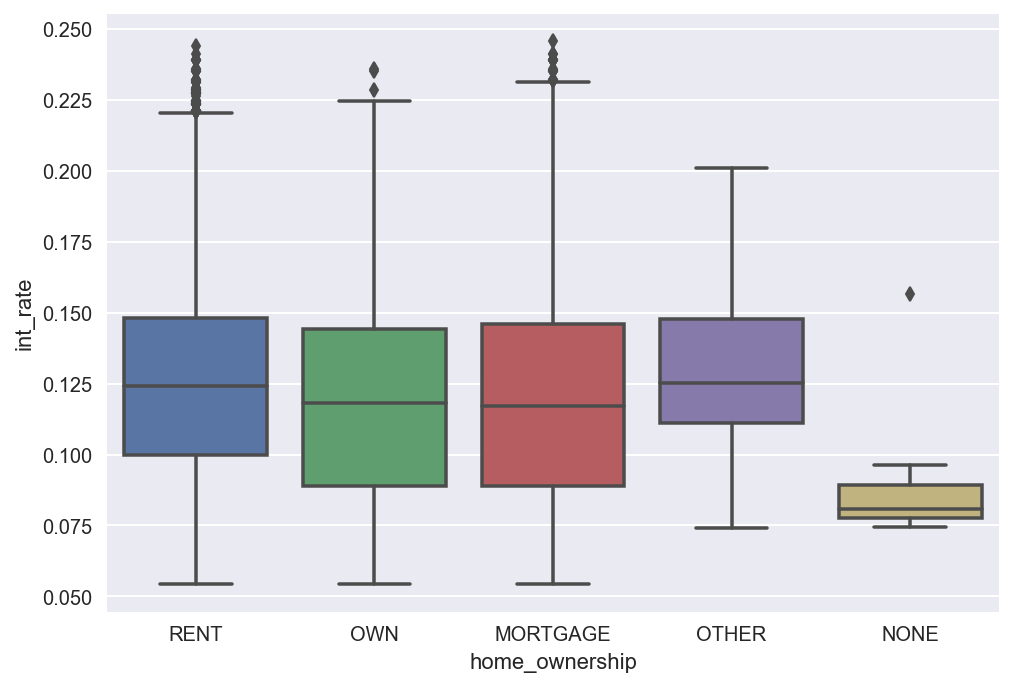

In [54]:
sns.boxplot(x='home_ownership', y='int_rate', data=Loan)

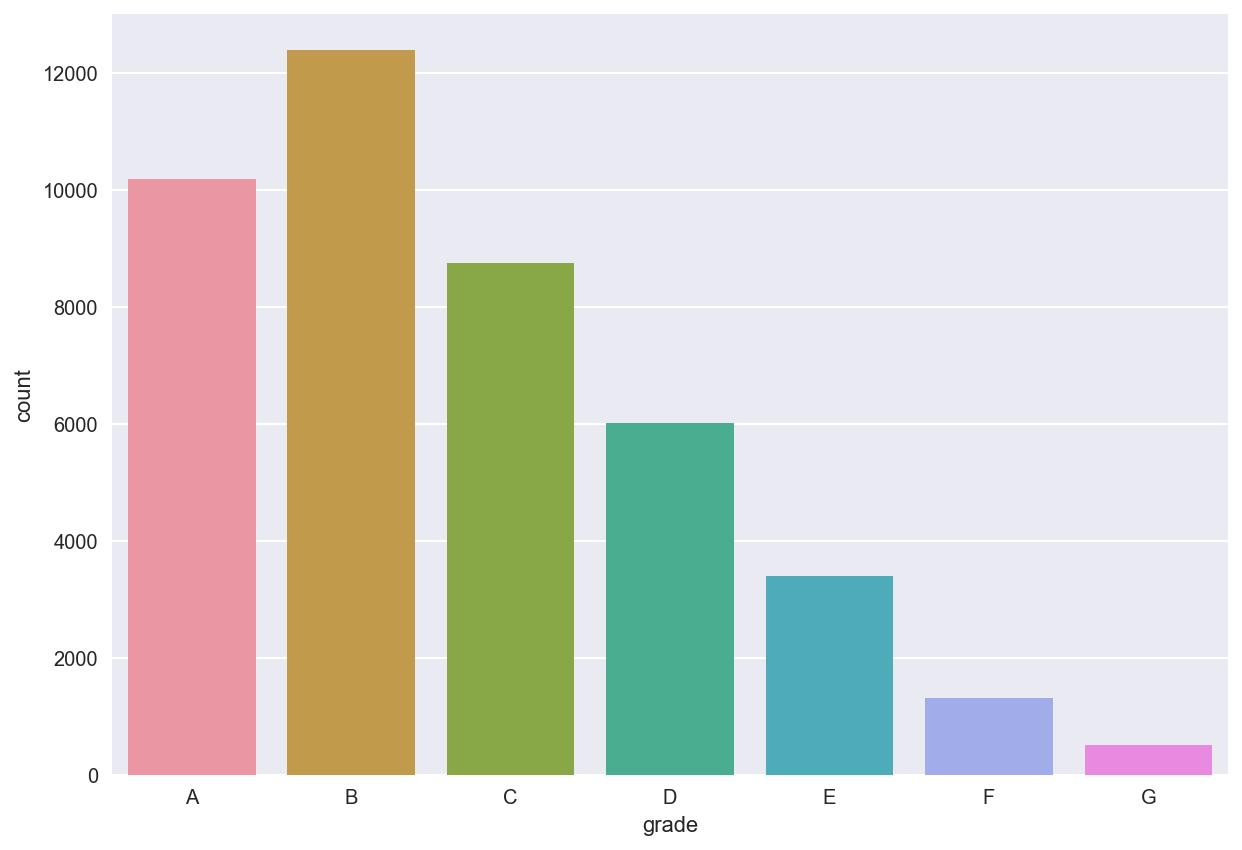

In [55]:
plt.figure(figsize=(10, 7))
sns.countplot(x="grade", data=Loan, order=['A', 'B', 'C', 'D', 'E', 'F', 'G'])

Fully Paid                                            0.802
Charged Off                                           0.133
Does not meet the credit policy. Status:Fully Paid    0.047
Does not meet the credit policy. Status:Charged Off   0.018
Name: loan_status, dtype: float64

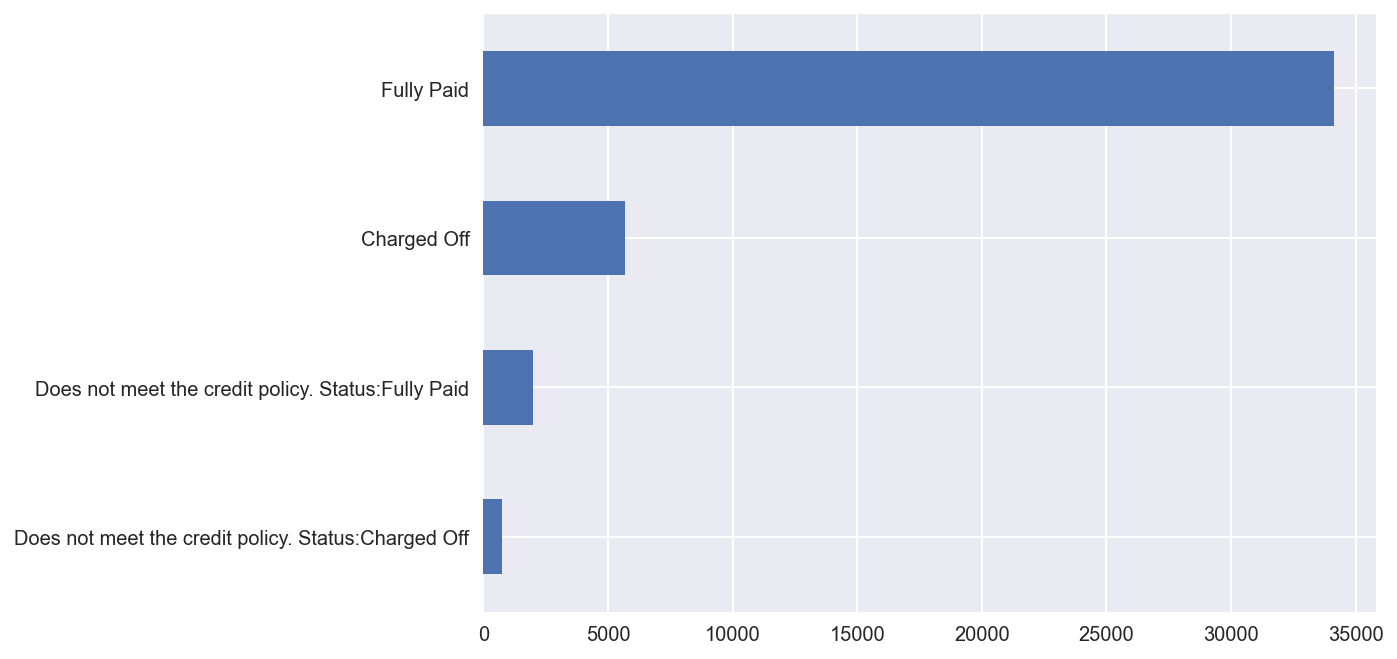

In [56]:
Loan["loan_status"].value_counts(ascending=True).plot(kind='barh')
Loan["loan_status"].value_counts()/Loan.shape[0]

There are four unique levels in the column we are interested to predict. As we are only interested in the fully paid and charged off levels, we will eliminate these to two levels later.

# ***II. Feature Engineering***


In [57]:
Loan.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,42535.000,42535.000,42535.000,42535.000,42535.000,42531.000,42535.000,42506.000,42506.000,15609.000,3651.000,42506.000,42506.000,42535.000,42506.000,42535.000,42535.000,42535.000,42535.000,42535.000,42535.000,42535.000,42535.000,42535.000,42535.000,42390.000,42535.000,42506.000,42390.000,42506.000,41170.000,42430.000
mean,11089.723,10821.586,10139.831,0.122,322.623,69136.556,13.373,0.152,1.081,35.018,59.176,9.344,0.058,14297.861,22.124,0.000,0.000,12019.008,11311.863,9675.676,2239.981,1.517,101.834,14.176,2613.246,0.000,1.000,0.000,0.000,0.143,0.045,0.000
std,7410.938,7146.915,7131.686,0.037,208.927,64096.350,6.726,0.512,1.527,22.418,47.145,4.496,0.246,22018.441,11.593,0.000,0.000,9094.163,9038.152,7105.750,2585.057,7.830,729.079,161.179,4385.067,0.000,0.000,0.010,0.000,29.360,0.209,0.005
min,500.000,500.000,0.000,0.054,15.670,1896.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000
25%,5200.000,5000.000,4950.000,0.096,165.520,40000.000,8.200,0.000,0.000,17.000,0.000,6.000,0.000,3635.000,13.000,0.000,0.000,5464.404,4792.255,4400.000,657.100,0.000,0.000,0.000,211.050,0.000,1.000,0.000,0.000,0.000,0.000,0.000
50%,9700.000,9600.000,8500.000,0.120,277.690,59000.000,13.470,0.000,1.000,33.000,85.000,9.000,0.000,8821.000,20.000,0.000,0.000,9682.252,8955.870,8000.000,1339.160,0.000,0.000,0.000,528.360,0.000,1.000,0.000,0.000,0.000,0.000,0.000
75%,15000.000,15000.000,14000.000,0.147,428.180,82500.000,18.680,0.000,2.000,51.000,101.000,12.000,0.000,17251.000,29.000,0.000,0.000,16425.370,15538.820,13499.995,2803.090,0.000,0.000,0.000,3170.220,0.000,1.000,0.000,0.000,0.000,0.000,0.000
max,35000.000,35000.000,35000.000,0.246,1305.190,6000000.000,29.990,13.000,33.000,120.000,129.000,47.000,5.000,1207359.000,90.000,0.000,0.000,58886.473,58563.680,35000.020,23886.470,209.000,29623.350,7002.190,36115.200,0.000,1.000,1.000,0.000,6053.000,2.000,1.000


As we can see from the summary statistics, there are lots of missing values in the dataset that we need to deal with.

### ***Propressing***

Remove and impute missing values

In [58]:
def clean_data(df):
    '''
    INPUT
    df - pandas dataframe

    OUTPUT
    df - a cleaned version of the original dataframe

    This function cleans df using the following steps :
    1. Drop all the rows without the target loan status
    2. Drop columns with no intereting information
    3. Drop columns related to information leakage
    4. For each numerical variable, fill with the medium value of the column.
    5. For each categorical variable, fill with the mode value of the column.
    6. Convert 'emp_length', 'earliest_cr_line' and 'revol_util' to numerical
    variables.
    7. Oridinal encoding categorical variables.
    '''

    # Drop rows without target loan status
    mask1 = df['loan_status'] == 'Fully Paid'
    mask2 = df['loan_status'] == 'Charged Off'
    df = df.loc[mask1 | mask2]

    # Drop columns
    df = df.drop(columns=['desc', 'sub_grade', 'emp_title', 'zip_code',
                          'addr_state', 'issue_d', 'pymnt_plan',
                          'policy_code', 'next_pymnt_d', 'title',
                          'initial_list_status', 'last_pymnt_d',
                          'application_type', 'hardship_flag',
                          'tax_liens'], axis=1)

    # Drop columns including up-to-date information of the loan status
    df = df.drop(columns=['total_rec_prncp', 'recoveries', 'total_pymnt',
                          'total_pymnt_inv', 'chargeoff_within_12_mths',
                          'last_pymnt_amnt', 'mths_since_last_delinq',
                          'last_credit_pull_d', 'total_rec_late_fee',
                          'delinq_2yrs', 'mths_since_last_record',
                          'collection_recovery_fee', 'total_rec_int',
                          'collections_12_mths_ex_med', 'out_prncp',
                          'out_prncp_inv', 'acc_now_delinq',
                          'delinq_amnt'], axis=1)

    # Fill numerical columns with the medium
    # Neural Network won't work with NA's
    # Lots of information will lose if simply dropping NA's
    # Distributions of numerical variables aren't normal（right-skewed）
    # So median would be a good representative 
    num_vars = df.select_dtypes(include=['number']).columns
    for col in num_vars:
        df[col].fillna((df[col].median()), inplace=True)

    # Fill categorical columns with the mode
    cat_vars = df.select_dtypes(include=['object']).columns
    for col in cat_vars:
        df[col].fillna((df[col].mode()[0]), inplace=True)

    # Convert to numerical variables.
    import re
    df['emp_length'] = df['emp_length'].apply(
        lambda x: re.findall(r'\d+', x)[0])
    df['emp_length'] = df['emp_length'].astype(int)
    df['earliest_cr_line'] = df['earliest_cr_line'].apply(
        lambda x: (2020-float(re.findall(r'\d+', x)[0])))
    df['revol_util'] = df['revol_util'].str.rstrip('%').astype('float') / 100.0

    # Ordinal encoding
    cat_vars = list(df.select_dtypes(include=['object']).columns)
    cat_vars.remove('loan_status')
    for var in cat_vars:
        class_mapping = {label:idx for idx, label in enumerate(np.unique(df[var]))}
        print(class_mapping)
        df[var]=df[var].map(class_mapping)
    return df

In [59]:
cleaned_loan = clean_data(Loan)

{' 36 months': 0, ' 60 months': 1}
{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6}
{'MORTGAGE': 0, 'NONE': 1, 'OTHER': 2, 'OWN': 3, 'RENT': 4}
{'Not Verified': 0, 'Source Verified': 1, 'Verified': 2}
{'car': 0, 'credit_card': 1, 'debt_consolidation': 2, 'educational': 3, 'home_improvement': 4, 'house': 5, 'major_purchase': 6, 'medical': 7, 'moving': 8, 'other': 9, 'renewable_energy': 10, 'small_business': 11, 'vacation': 12, 'wedding': 13}


In [60]:
check_missing_value(cleaned_loan)

The number of columns with missing values: 0


In [61]:
cleaned_loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
0,5000.000,5000.000,4975.000,0,0.106,162.870,1,10,4,24000.000,2,Fully Paid,1,27.650,35.000,1.000,3.000,0.000,13648.000,0.837,9.000,0.000
1,2500.000,2500.000,2500.000,1,0.153,59.830,2,1,4,30000.000,1,Charged Off,0,1.000,21.000,5.000,3.000,0.000,1687.000,0.094,4.000,0.000
2,2400.000,2400.000,2400.000,0,0.160,84.330,2,10,4,12252.000,0,Fully Paid,11,8.720,19.000,2.000,2.000,0.000,2956.000,0.985,10.000,0.000
3,10000.000,10000.000,10000.000,0,0.135,339.310,2,10,4,49200.000,1,Fully Paid,9,20.000,24.000,1.000,10.000,0.000,5598.000,0.210,37.000,0.000
4,3000.000,3000.000,3000.000,1,0.127,67.790,1,1,4,80000.000,1,Fully Paid,9,17.940,24.000,0.000,15.000,0.000,27783.000,0.539,38.000,0.000


In [62]:
# One hot encoding for Y
class_mapping = {"Fully Paid":0, "Charged Off":1}
cleaned_loan['loan_status']=cleaned_loan['loan_status'].map(class_mapping)

In [63]:
cleaned_loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
0,5000.000,5000.000,4975.000,0,0.106,162.870,1,10,4,24000.000,2,0,1,27.650,35.000,1.000,3.000,0.000,13648.000,0.837,9.000,0.000
1,2500.000,2500.000,2500.000,1,0.153,59.830,2,1,4,30000.000,1,1,0,1.000,21.000,5.000,3.000,0.000,1687.000,0.094,4.000,0.000
2,2400.000,2400.000,2400.000,0,0.160,84.330,2,10,4,12252.000,0,0,11,8.720,19.000,2.000,2.000,0.000,2956.000,0.985,10.000,0.000
3,10000.000,10000.000,10000.000,0,0.135,339.310,2,10,4,49200.000,1,0,9,20.000,24.000,1.000,10.000,0.000,5598.000,0.210,37.000,0.000
4,3000.000,3000.000,3000.000,1,0.127,67.790,1,1,4,80000.000,1,0,9,17.940,24.000,0.000,15.000,0.000,27783.000,0.539,38.000,0.000


## ***Train-test Split***

In [64]:
from sklearn.model_selection import train_test_split

Y = cleaned_loan["loan_status"]
X = cleaned_loan.drop(["loan_status"], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, random_state=2020, test_size=.30, stratify=Y
)

## ***Transformation***

In [65]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# ***III. Model Fitting***

In [66]:
from sklearn import metrics
from sklearn.metrics import roc_curve


def plot_ROC(model, labels):
    '''Plot ROC and save the pic'''
    Y_test_pred = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(Y_test, Y_test_pred)
    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label=labels)
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve - {} model'.format(labels))
    plt.legend(loc='best')
    plt.savefig(labels+'_ROC.png', dpi=150)
    plt.show()
    print("AUC score is", metrics.auc(fpr, tpr))
    return

In [67]:
def plot_feature_importance(model, labels):
    '''Plot the feature importance plot and save the file'''
    # feature importance
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    # Print the feature ranking
    temp = pd.DataFrame(importances[indices], X.columns[indices])
    temp.columns = ["Feature importance"]
    temp["Feature name"] = temp.index
    plt.subplots(figsize=(10, 8))
    ax = sns.barplot(
        y="Feature name",
        x="Feature importance",
        data=temp.iloc[:20, ]
    )
    plt.title("Feature Importance_"+labels)
    plt.savefig(labels+'_FI.png', dpi=150)
    return

In [68]:
def training_score(model):
    print("Training accuracy is {:.4f}".format(model.score(X_train, Y_train)))


def testing_score(model):
    print("Testing accuracy is {:.4f}".format(model.score(X_test, Y_test)))

## ***Support Vector Machine***

In [52]:
from sklearn.svm import SVC 

classifier_SVC = SVC(probability=True)
classifier_SVC.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

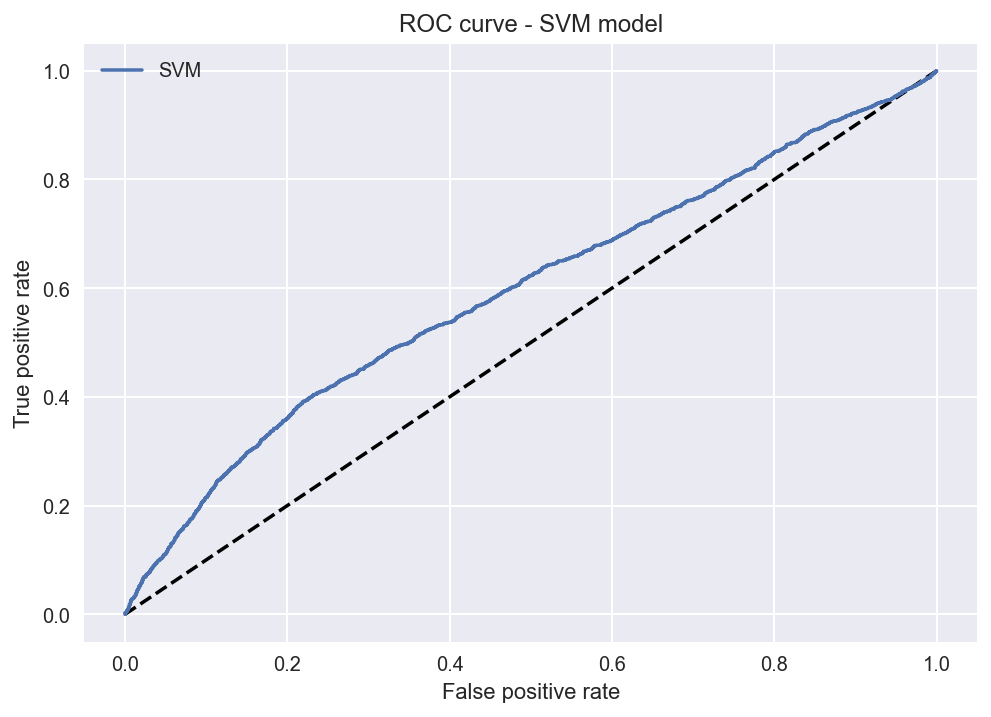

AUC score is 0.5935360302727182


In [53]:
plot_ROC(classifier_SVC, "SVM")

In [95]:
testing_score(classifier_SVC)

Testing accuracy is 0.8575


## ***Light GBM***

In [34]:
import lightgbm as lgb
import random

from sklearn.metrics import confusion_matrix
random.seed(2020)

In [35]:
# Use grid search and 5 fold cross validation to find the best model
parameters = {
    "n_estimators": (50, 100, 200),
    "max_depth" : (5,),
    "reg_lambda" : (0.1,0.01)
}
model_lgb =lgb.LGBMClassifier(eval_metric = "auc")
Grid_lgbm = GridSearchCV(model_lgb,parameters, cv=5,  scoring = "roc_auc")

In [36]:
Grid_lgbm.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0, eval_metric='auc',
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_state=None, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': (5,), 'n_estimators': (50, 100, 200),

In [37]:
best_lgbm = Grid_lgbm.best_estimator_
best_lgbm

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               eval_metric='auc', importance_type='split', learning_rate=0.1,
               max_depth=5, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=50, n_jobs=-1, num_leaves=31,
               objective=None, random_state=None, reg_alpha=0.0,
               reg_lambda=0.01, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

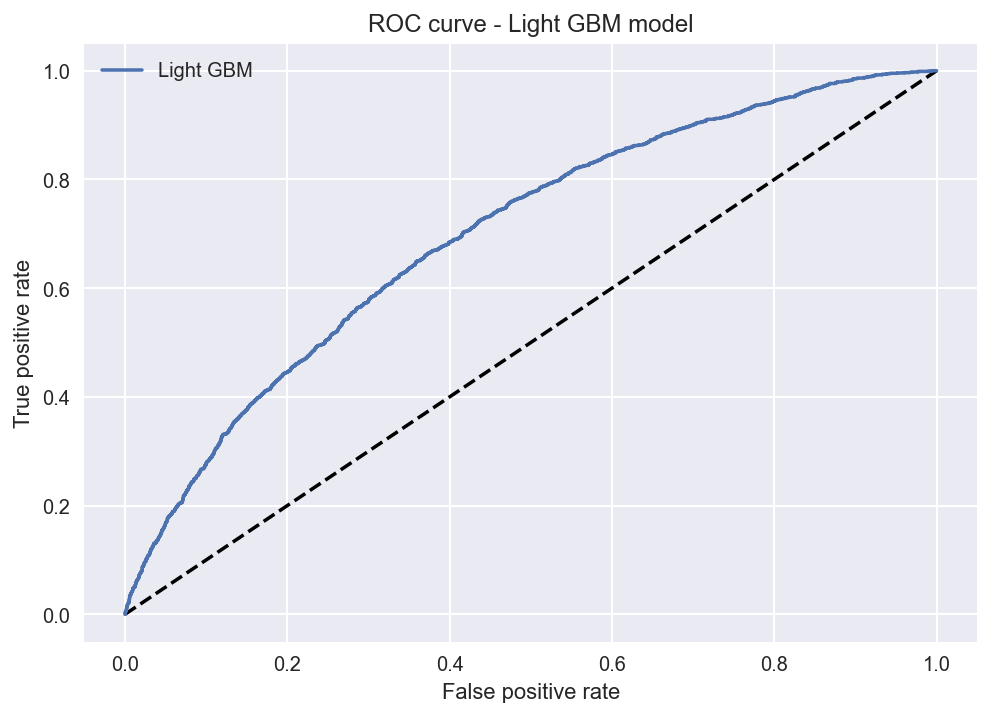

AUC score is 0.6973941303529319


In [96]:
plot_ROC(best_lgbm, "Light GBM")

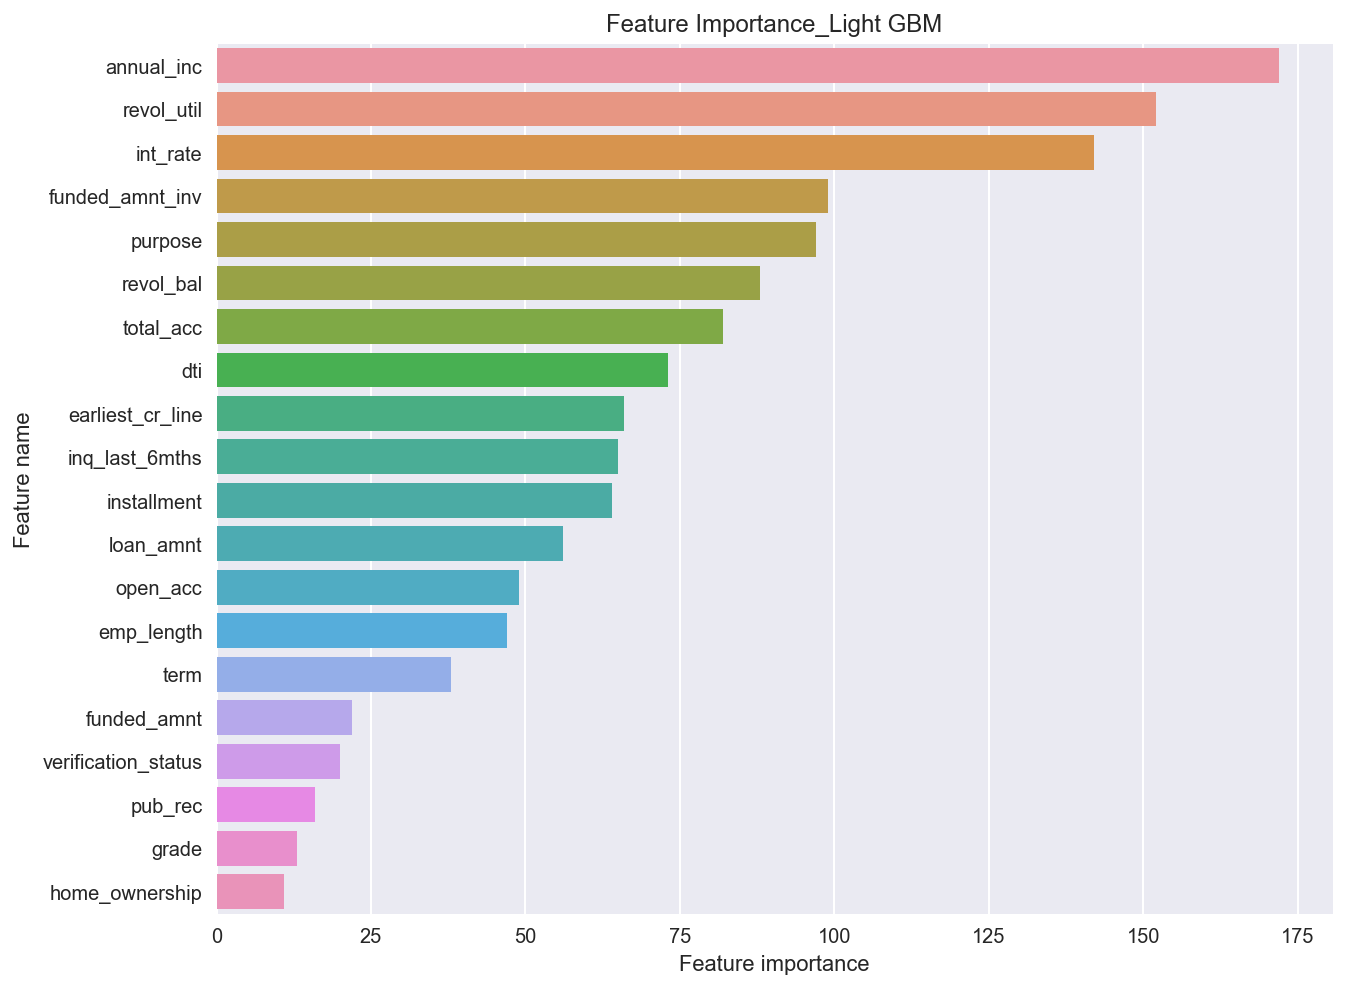

In [97]:
plot_feature_importance(best_lgbm, "Light GBM")

In [98]:
training_score(best_lgbm)

Training accuracy is 0.8594


In [103]:
testing_score(best_lgbm)

Testing accuracy is 0.8570


# ***IV. Model Evaluation***

In [107]:
import itertools
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report


def confusion_plot(model, labels):
    """Plot the confusion plot of the test set"""
    Y_test_pred = model.predict(X_test)
    cm = confusion_matrix(Y_test, Y_test_pred)
    model_eval = precision_recall_fscore_support(Y_test, Y_test_pred)
    print("The precision is", model_eval[0])
    print("The recall is", model_eval[1])
    print("The F1 score is", model_eval[2])
    cmap = plt.cm.Reds

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar()
    tick_marks = np.arange(len(['No', 'Yes']))
    plt.xticks(tick_marks, ['No', 'Yes'], rotation=45)
    plt.yticks(tick_marks, ['No', 'Yes'])
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(
            j, i, format(cm[i, j], 'd'),
            horizontalalignment="center",
            color="white" if cm[i, j] > cm.max() / 2 else "black"
        )
    ax = plt.axes()
    t = 'Confusion Matrix:'
    ax.set_title(t, fontweight="bold", size=10)
    plt.savefig(labels+'_cm.png', dpi=150)
    plt.show()

## ***Light GBM***

In [40]:
# Make predictions on the testing set
Y_pred_lightgbm = best_lgbm.predict(X_test)
testing_score(best_lgbm)

Testing accuracy is 0.857


In [41]:
print(classification_report(Y_test, Y_pred_lightgbm))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92     10235
           1       0.41      0.01      0.02      1701

    accuracy                           0.86     11936
   macro avg       0.63      0.50      0.47     11936
weighted avg       0.79      0.86      0.79     11936



The precision is [0.85819892 0.40625   ]
The recall is [0.99814362 0.00764256]
The F1 score is [0.92289625 0.01500289]


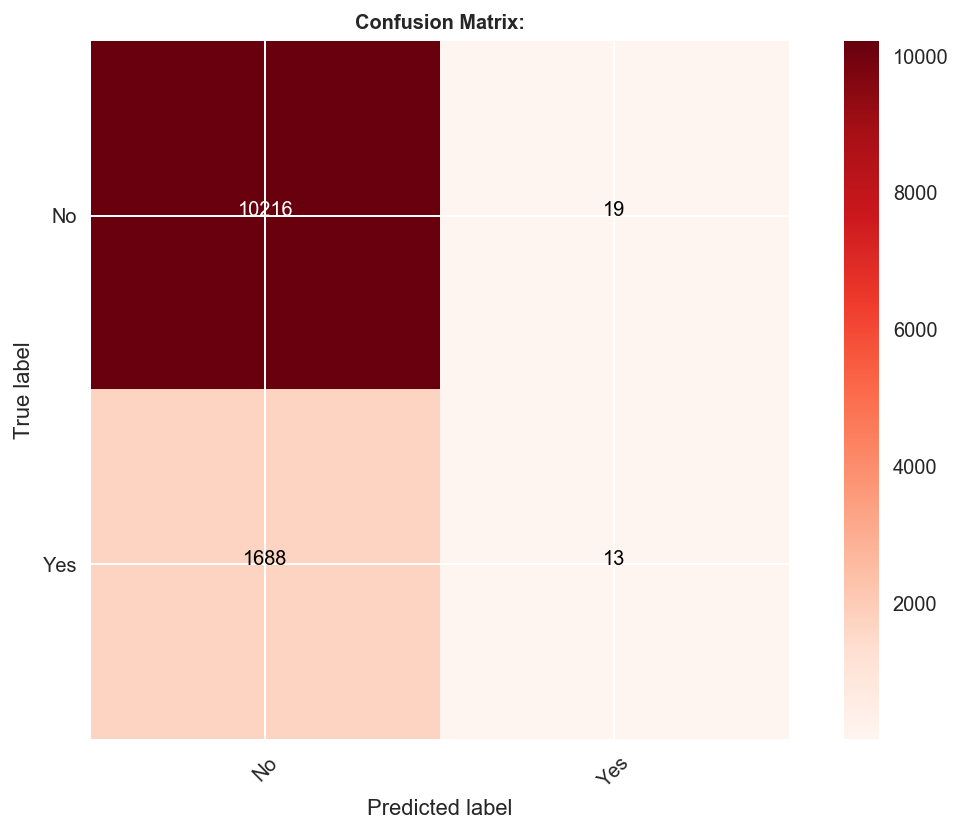

In [42]:
confusion_plot(best_lgbm,"lgbm")